# Práctica de representación gráfica de funcións de dúas variables

## Gráficas de funcións dadas explícitamente

O SageMath permítemos representar graficamente expresións simbólicas:

In [1]:
var('y')
plot3d(x^2+y^2,(x,-1,1),(y,-1,1))

Graphics3d Object

A opción adaptive ten o efecto secundario de usar o mapa de cores `gist_rainbow`:

In [2]:
plot3d(x^2+y^2, (x,-1,1), (y,-1,1), adaptive=True)

Graphics3d Object

Con `plot3d` tamén se poden representar funcions Python:

In [3]:
def f(x,y):
    if x < 0:
        return x+y^2
    else:
        return x^4 + y^2
plot3d(f, (x, -2, 2), (y, -2, 2))

Graphics3d Object

Podemos modificar a relación de aspecto entre os eixos:

In [4]:
plot3d(f, (x, -2, 2), (y, -2, 2), aspect_ratio=(1,1,0.1))

Graphics3d Object

As gráficas de funcións con singularidades en fronteiras curvas poden ter unha representación deficiente:

In [3]:
f(x,y) = 1/(x^2+2*y^2-1) 
show(f)

(x, y) |--> 1/(x^2 + 2*y^2 - 1)

In [4]:
plot3d(f, (x,-2,2), (y,-2,2))

Graphics3d Object

Un xeito de solucionalo é limitar os valores que pode acadar a función:

In [7]:
flim = lambda x,y: f(x,y) if abs(x^2+2*y^2-1) > 0.11 else NaN
plot3d(flim, (x,-2,2), (y,-2,2), aspect_ratio=(1,1,0.2))

Graphics3d Object

O máis habitual é representar as curvas de nivel:

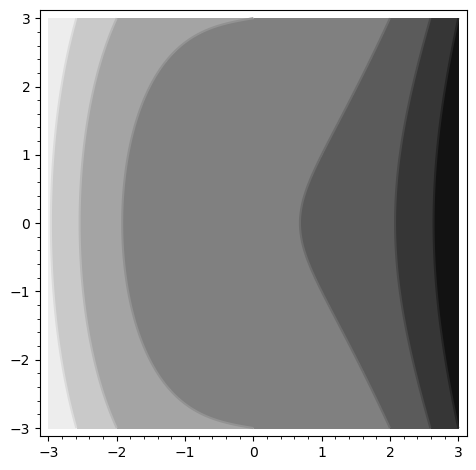

In [5]:
f(x,y) = y^2+1-x^3-x
contour_plot(f, (x,-3,3), (y,-3,3))

Vexamos a gráfica en 3D para comparar:

In [9]:
plot3d(f, (x,-3,3), (y,-3,3), adaptive=True, aspect_ratio=(1,1,0.1))

Graphics3d Object

Usualmente se utilizan argumentos opcionais:

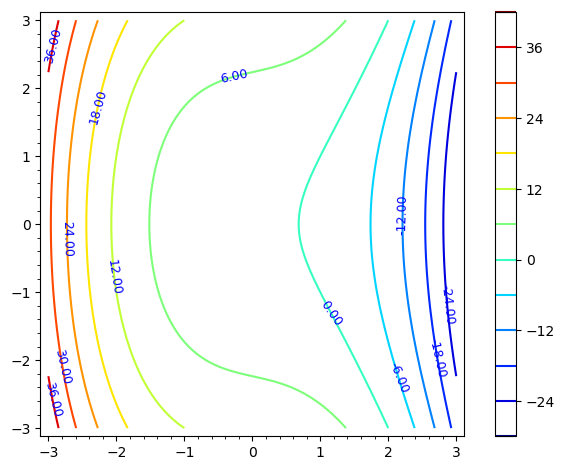

In [10]:
contour_plot(f, (x,-3,3), (y,-3,3), fill=False, cmap='jet', contours=12, labels=True, colorbar=True)

Os argumentos anteriores son de tipo "lista": 

`[f, (x,-3,3), (y,-3,3)]`  

ou de tipo "diccionario":  

`{'fill':False, 'cmap':'jet', 'contours':12, 'labels':True, 'colorbar':True}`

Os de tipo "lista" van sempre antes que calquera dos segundos. Para usalos desde a lista, deben desempaquetarse co operador `*` ao final dos de tipo "lista". Os de tipo "diccionario" desempaquétanse co operador `**`. 

No exemplo seguinte queremos modificar a función e o recheo, pero non o resto de argumentos:

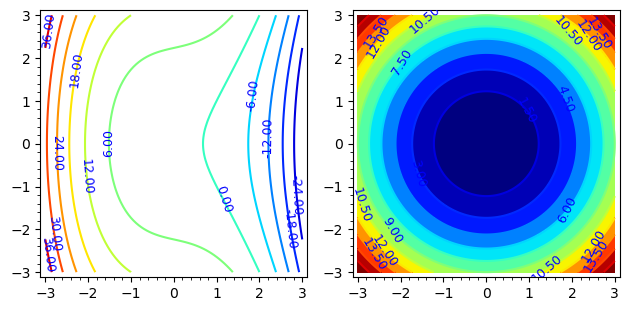

In [11]:
args = [(x,-3,3), (y,-3,3)]
kwds = {'cmap':'jet', 'contours':12, 'labels':True}
g1 = contour_plot(f,       *args, fill=False, **kwds)
g2 = contour_plot(x^2+y^2, *args, fill=True,  **kwds)
graphics_array([g1, g2])

Observa que o desempaquetamento tamén é necesario para pasar as compoñentes dunha lista a unha función de varias variables: se `v = [1,2]` e `f(x,y)` ten dous argumentos, daquela `f(v)` sería incorrecto porque se pasa un único argumento a `f`.

In [12]:
v = [1,2]
f(*v) #correcto, mentras que f(v) é incorrecto

3

Comprobemos que o gradiente é perpendicular ás curvas de nivel e apunta na dirección de máximo crecemento en cada punto.

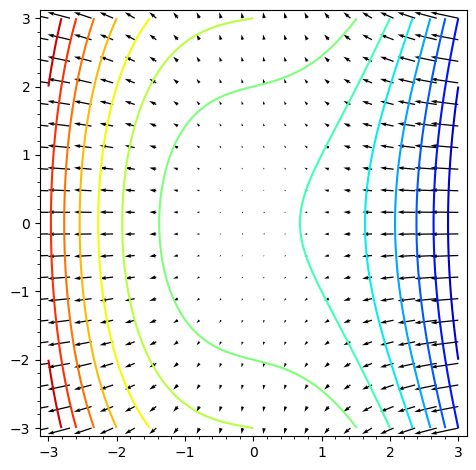

In [13]:
args = [(x,-3,3), (y,-3,3)]
kwds = {'fill':False, 'cmap':'jet'}
contour_plot(f, *args, contours=15, **kwds) + plot_vector_field(diff(f), *args)

### Exercicio 1a:
Mostra a gráfica de $z = x^2+y^2$ con `plot3d` e observa o aspecto das súas curvas de nivel arredor do mínimo en $(0,0)$. Pinta aparte o vector gradiente.

### Exercicio 1b:
Repite as gráficas para $z = -x^2-y^2$ e observa o seu máximo en $(0,0)$.

### Exercicio 1c:
Repite as gráficas para $z = x^2-y^2$ e observa o seu punto de sela en $(0,0)$.

## Aplicacións da representación gráfica de funcións
A continuación repasamos algunas das gráficas que utilizaremos en temas posteriores.
### Solucións de sistemas non lineares $2\times 2$
Ao resolver numericamente un sistema non linear $2\times 2$ (equivalentemente, calcular a raíz dunha función vectorial) mediante o método de Newton, hai que partir dun iterante inicial próximo a unha solución, polo que é necesario localizalas aproximadamente. Consideremos a función vectorial:

$\displaystyle \mathbf{f}(x,y) = \left(\begin{array}{c} x^2-y^2+2y\\ 2x+y^2-6 \end{array}\right).$

Observa como os vectores se representan con negrita.

In [14]:
f(x,y) = [x^2-y^2+2*y, 2*x+y^2-6]

Representamos con distinta cor as curvas de nivel cero das súas compoñentes. Alí onde intersecan, están as súas raíces:

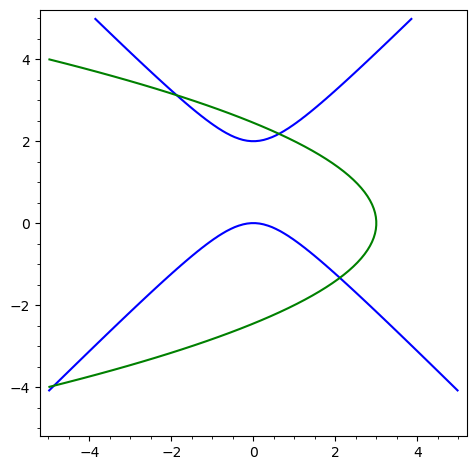

In [15]:
args = [(x,-5,5),(y,-5,5)]
kwds = {'fill':False, 'contours':[0]}
contour_plot(f(x,y)[0],*args, cmap=['blue'], **kwds) + contour_plot(f(x,y)[1],*args, cmap=['green'], **kwds)

Observa que `contours=[0]` ordena pintar a curva de nivel para a que a función vale 0; `contours=0` sería incorrecto porque ordenaría pintar cero curvas de nivel.

Ademade `cmap=['green']` ordena usar únicamente a cor verde; `cmap='green'` ordenaría pintar un mapa de cores chamado `green`, que non existe.

### Exercicio 2a: 
Debuxa as curvas de nivel en $[-5,5]\times[-5,5]$ da función 

$\displaystyle \mathbf{f}(x,y) = \left(\begin{array}{c} 3x^2-y^2\\ 3xy^2-x^3-1 \end{array}\right).$

### Exercicio 2b: 
Debuxa as curvas de nivel en $[-5,5]\times[-5,5]$ da función:

$\displaystyle \mathbf{f}(x,y) = \left(\begin{array}{c} \log(x^2+y^2)-\sin(xy)-\log(2)-\log(\pi)\\ \exp(x-y)+\cos(xy); \end{array}\right).$

### Extremos de funcións de varias variables
Cando buscamos os extremos dunha función escalar de dúas variables, é útil achar os puntos críticos da función: máximos. mínimos e puntos de sela.

Consideramos a función $h(x,y) = sen(\pi x)\cdot cos(\pi y)$ no conxunto $[-1,1]\times [-\frac{1}{2},\frac{3}{2}]$ e representamos as súas curvas de nivel:

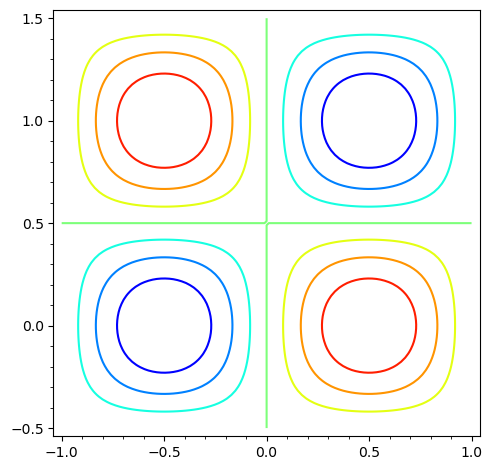

In [16]:
h(x,y) = sin(pi*x)*cos(pi*y)
contour_plot(h, (x,-1,1), (y,-0.5,1.5), fill=False, cmap='jet')

Pódense observar mínimos locais en $(-\frac{1}{2},0)$ e $(\frac{1}{2},1)$, máximos locais en $(-\frac{1}{2},1)$ e $(\frac{1}{2},0)$ e un punto de sela en $(0,\frac{1}{2})$. 

Os puntos críticos de $h$ son as raíces da derivada de $h$, polo que outro xeito de identificar os puntos críticos é atopar a intersección das curvas de nivel cero da derivada de $h$.

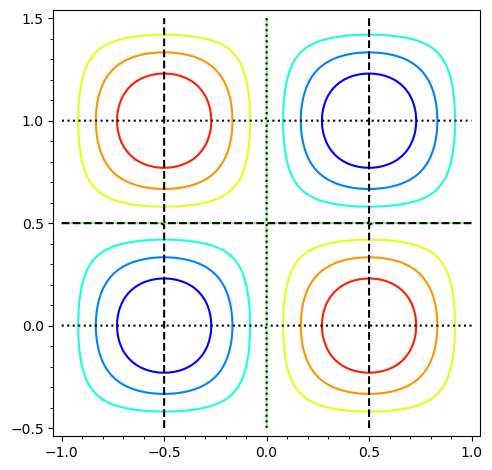

In [17]:
args = [(x,-1,1), (y,-0.5,1.5)]
g1   = contour_plot(h, *args, fill=False, cmap='jet')
kwds = {'fill':False, 'contours':[0], 'cmap':['black']}
g2   = contour_plot(diff(h,x), *args, linestyles='--', **kwds)
g3   = contour_plot(diff(h,y), *args, linestyles=':',  **kwds)
g1+g2+g3

Observa que as interseccións das rectas punteadas e raiadas coinciden cos puntos críticos de $g$ xa calculados.

### Exercicio 3:

Identifica os máximos, mínimos e puntos de sela de $h(x,y) = -x^4+y^3-32x-12y+5$ en $[-5,5]\times [-5,5]$.

### Representación gráfica do plano tanxente
Dada a función $f(x,y) = \log(1-x^2-y^2)$, pretendemos representar a súa gráfica e a do seu plano tanxente en $(0,1/2)$:

In [18]:
var('y')
f(x,y)  = log(1-x^2-y^2)
(x0,y0) = (0,1/2)
G1 = plot3d(f,(x,-0.6,0.6),(y,-0.6,0.6))
G1

Graphics3d Object

O plano tanxente $p(x,y)$ calcúlase avaliando as derivadas parciais da función no punto:

In [19]:
p(x,y) = f(x0,y0)+diff(f,x)(x0,y0)*(x-x0)+diff(f,y)(x0,y0)*(y-y0)
show('Plano tanxente da funcion f(x,y)=', f(x,y), ' en (', x0, ',', y0, '): z=',p(x,y))

'Plano tanxente da funcion f(x,y)=' log(-x^2 - y^2 + 1) ' en (' 0 ',' 1/2 '): z=' -4/3*y + log(3/4) + 2/3

In [20]:
G2 = plot3d(p, (x,-0.25,0.25), (y,0.25,0.75),color='green')
G3 = point3d([(x0,y0,f(x0,y0))], size=8, color='purple')
G1+G2+G3

Graphics3d Object